# Import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Read Data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Print the data types

In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see there are three format of data types:
object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.

int64: It represents the integer variables. ApplicantIncome is of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History 

In [4]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [5]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [6]:
df.dropna(inplace=True)

# Shape of the dataset

In [7]:
df.shape

(542, 13)

In [8]:
#train["Loan_Status"].size
df["Loan_Status"].count()

542

In [9]:
df["Loan_Status"].value_counts()

Y    376
N    166
Name: Loan_Status, dtype: int64

<AxesSubplot:title={'center':'Loan_Status'}>

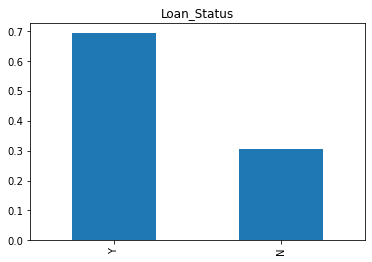

In [10]:
df["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

# Analysis on "Gender" variable :

In [11]:
df["Gender"].count()

542

In [12]:
df["Gender"].value_counts()

Male      444
Female     98
Name: Gender, dtype: int64

In [13]:
df['Gender'].value_counts(normalize=True)*100

Male      81.918819
Female    18.081181
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'Gender'}>

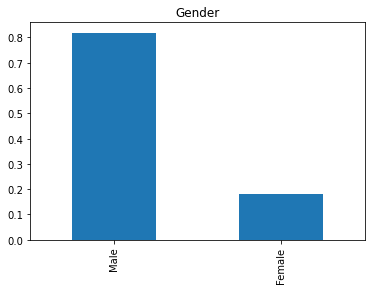

In [14]:
df['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

# Analysis on "Married" variable :

In [15]:
df["Married"].count()

542

In [16]:
df["Married"].value_counts()

Yes    355
No     187
Name: Married, dtype: int64

In [17]:
df['Married'].value_counts(normalize=True)*100

Yes    65.498155
No     34.501845
Name: Married, dtype: float64

<AxesSubplot:title={'center':'Married'}>

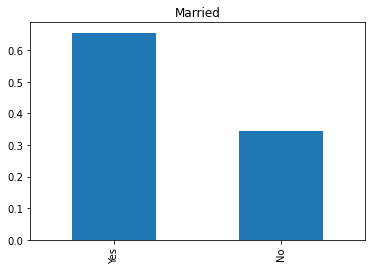

In [18]:
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

# Analysis on "Self_Employed" variable :

In [19]:
df["Self_Employed"].count()

542

In [20]:
df["Self_Employed"].value_counts()

No     467
Yes     75
Name: Self_Employed, dtype: int64

In [21]:
df['Self_Employed'].value_counts(normalize=True)*100

No     86.162362
Yes    13.837638
Name: Self_Employed, dtype: float64

<AxesSubplot:title={'center':'Self_Employed'}>

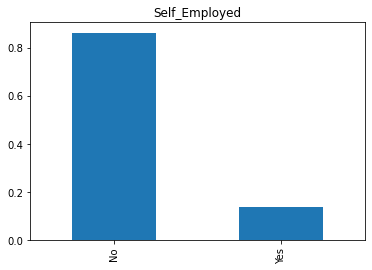

In [22]:
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

# Analysis on "Credit_History" variable :

In [23]:
df["Credit_History"].count()

542

In [24]:
df["Credit_History"].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

In [25]:
df['Credit_History'].value_counts(normalize=True)*100

1.0    86.346863
0.0    13.653137
Name: Credit_History, dtype: float64

<AxesSubplot:title={'center':'Credit_History'}>

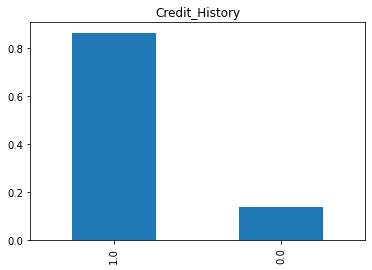

In [26]:
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

Around 84% applicants have repaid their debts.

# Analysis on "Dependents" variable :

In [27]:
df['Dependents'].count()

542

In [28]:
df["Dependents"].value_counts()

0     309
1      94
2      94
3+     45
Name: Dependents, dtype: int64

Number of 0 Dependent : 309

Number of 1 Dependent : 94

Number of 2 Dependesnt : 94

Number of 3+ Dependent : 45

In [29]:
df['Dependents'].value_counts(normalize=True)*100

0     57.011070
1     17.343173
2     17.343173
3+     8.302583
Name: Dependents, dtype: float64

In [30]:
df['Dependents'].value_counts(normalize=True)*100

0     57.011070
1     17.343173
2     17.343173
3+     8.302583
Name: Dependents, dtype: float64

<AxesSubplot:title={'center':'Dependents'}>

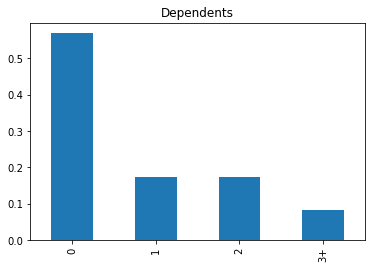

In [31]:
df['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

In [32]:
#df['Loan_Status'].replace('Y',1,inplace=True)
#df['Loan_Status'].replace('N',0,inplace=True)

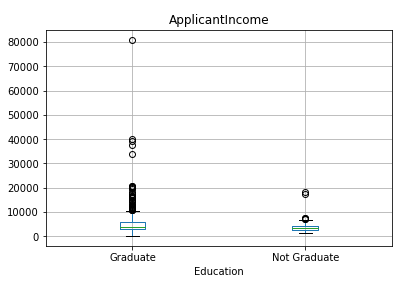

In [33]:
df.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

# Let’s look at the "CoapplicantIncome" distribution :

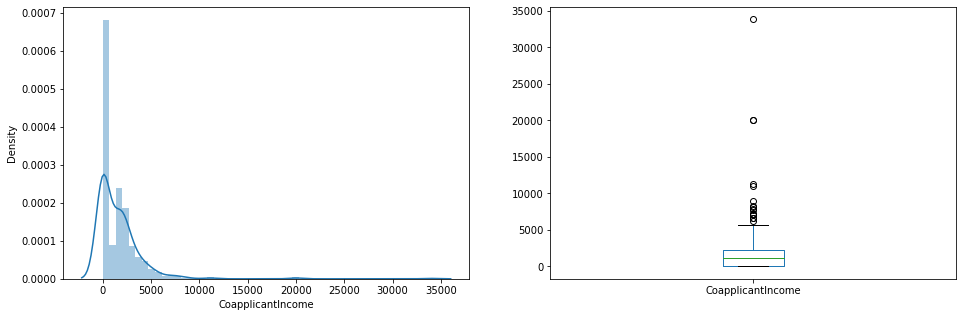

In [34]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df["CoapplicantIncome"]);

plt.subplot(122)
df["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

# Let’s look at the distribution of "LoanAmount" variable :

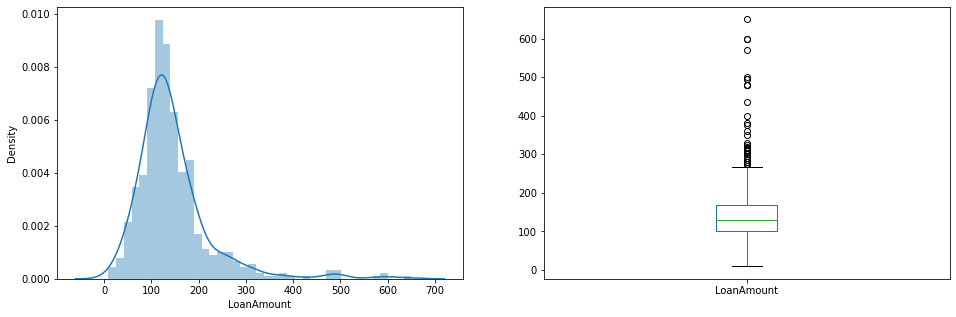

In [35]:
plt.figure(1)
plt.subplot(121)
df=df.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# distribution of "LoanAmountTerm" variable :

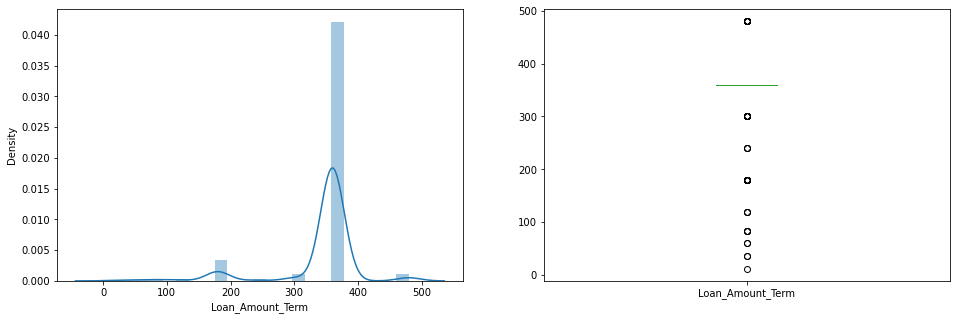

In [36]:
plt.figure(1)
plt.subplot(121)
df = df.dropna()
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

# Relation between "Loan_Status" and "Gender"

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


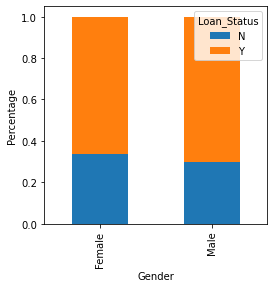

In [37]:
print(pd.crosstab(df["Gender"],df["Loan_Status"]))
Gender = pd.crosstab(df["Gender"],df["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Number of Female whose Loan was approed : 65

Number of Male whose Loan was approed : 311

Number of Female whose Loan was not approed : 33

Number of Male whose Loan was not approed : 133

Proportion of Male applicants is higher for the approved loans.

# Relation between "Loan_Status" and "Married"

Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


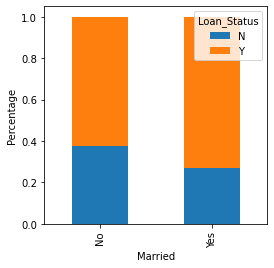

In [38]:
print(pd.crosstab(df["Married"],df["Loan_Status"]))
Married=pd.crosstab(df["Married"],df["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Number of married people whose Loan was approed : 259

Number of married people whose Loan was not approed : 96

Number of unmarried people whose Loan was approed : 117

Number of unmarried people whose Loan was not approed : 70

Proportion of Married applicants is higher for the approved loans.

# Relation between "Loan_Status" and "Dependents"

Loan_Status   N    Y
Dependents          
0            95  214
1            33   61
2            22   72
3+           16   29


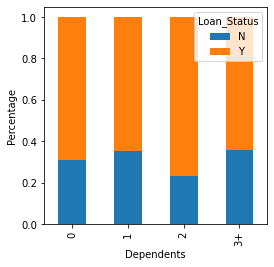

In [39]:
print(pd.crosstab(df['Dependents'],df["Loan_Status"]))
Dependents = pd.crosstab(df['Dependents'],df["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

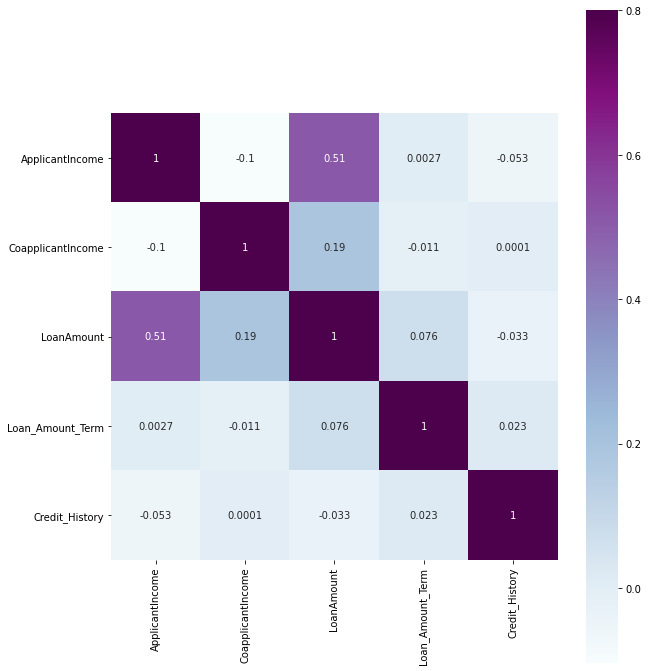

In [40]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).

In [41]:
df.Loan_Status=df.Loan_Status.map({'Y':1,'N':0})

In [42]:
df.Gender=df.Gender.map({'Male':1,'Female':0})

In [43]:
df.Married=df.Married.map({'Yes':1,'No':0})

In [44]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [45]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})

In [46]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})

In [47]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [48]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,1,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [49]:
df=df.drop(['Loan_ID'],axis=1)
df.head

<bound method NDFrame.head of      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncom

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [50]:
x = df.drop("Loan_Status",axis=1)
y = df['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x,  y, test_size=0.3,random_state=0)
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
572,1,1,2,1,0,16666,0.0,275.0,360.0,1.0,2
204,1,1,2,0,0,3917,0.0,124.0,360.0,1.0,1
516,0,1,2,1,0,2031,1632.0,113.0,480.0,1.0,1
143,1,1,0,1,0,2698,2034.0,122.0,360.0,1.0,1
177,1,1,3,1,0,5516,11300.0,495.0,360.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
80,0,0,0,1,0,3846,0.0,111.0,360.0,1.0,1
313,1,1,2,1,1,5746,0.0,144.0,84.0,1.0,0
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1
408,1,1,1,1,0,8300,0.0,152.0,300.0,0.0,1


The dataset has been divided into training and validation part.

70% data will use for train the model and rest of the 30% data will use for checking validation of the model.

# Logistic Regression

In [51]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [52]:
predictions = model.predict(x_train)

In [53]:
print(predictions)

[1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1]


In [54]:
lr_prediction = model.predict(x_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))


Logistic Regression accuracy =  0.8098159509202454


So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly for our logistic regression model.

In [55]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [56]:
df.head(100)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,1,3,0,0,2071,754.0,94.000000,480.0,1.0,1,1
110,1,0,0,1,0,5316,0.0,136.000000,360.0,1.0,2,1
113,0,0,1,1,1,7451,0.0,146.412162,360.0,1.0,1,1
115,1,1,1,1,0,14583,0.0,185.000000,180.0,1.0,0,1
